In [7]:
import random

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm
from scipy.integrate import simps
import matplotlib.pyplot as plt
import imageio
import multiprocessing
from scipy import integrate
from helpers import Fy, find_closest_element, get_densities, get_cdf, predict_single_density
import statsmodels.api as sm
from compute_dens import comp_dens

# read in val data
B_zeta = np.load('../../../../data/commaai/extracted_coefficients/copula_cpl/Bzeta/B_zeta_val.npy')
true_y = np.load('../../../../data/commaai/extracted_coefficients/copula_cpl/Bzeta/labels_val.npy')
B_zeta = B_zeta[np.abs(true_y) < 50,:] 
true_y = true_y[np.abs(true_y) < 50]

density_path = '../../../../data/commaai/density/gaussian_density_filtered.csv'
density = pd.read_csv(density_path)

no_points = 750
grid = np.linspace(min(density['axes']), max(density['axes']), no_points)

# estimate density 
kde = sm.nonparametric.KDEUnivariate(true_y)
kde.fit()
support = kde.support
endog = kde.endog
density_gauss = kde.density

dens_pred = comp_dens(density, no_points, B_zeta)

In [3]:
hmc_horse = dens_pred.compute_dens('va_ridge')

100%|██████████| 10472/10472 [00:12<00:00, 809.08it/s]


In [34]:
densities = hmc_horse['densities']
#random.shuffle(densities)

In [20]:
for i in densities[0,50]:
    plt.plot(grid, i)

TypeError: list indices must be integers or slices, not tuple

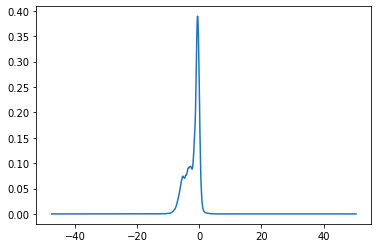

In [74]:
plt.plot(grid, densities[19])

In [ ]:
#15, 19, 56

In [56]:
path_all_imgs = '../../../../data/commaai/training_files_filtered/indices/val_indices.csv'
all_img_df = pd.read_csv(path_all_imgs)
img_path_base = '../../../../data/commaai/train_bags_2/'

In [62]:
all_img_df.loc[56]['path']

'0/137_784run1.png'

In [78]:
all_img_df[all_img_df['path'] == '0/118_977run1.png']

,id,path,use,angle,filenumber


In [72]:
img = plt.imread(str(img_path_base + all_img_df.loc[19]['path']))

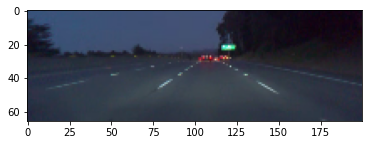

In [73]:
plt.imshow(img)

In [ ]:
paths = ['../../../data/commaai/train_bags_2/0/80_436run1.png', # parting road, closer
         '../../../data/commaai/train_bags_2/0/121_254run1.png',# # parting road, closer, other side
        '../../../data/commaai/train_bags_2/0/118_977run1.png', # left turn only half visible
        ]